Exercise 5.1

8.471516831683186


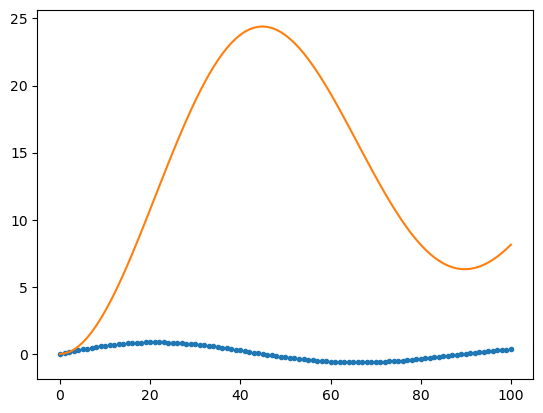

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("velocities.txt")

x = data[:,0]
y = data[:,1]

h = (x[-1]-x[0])/len(x)
a = x[0]
b = x[-1]

s = 0.5*y[0] + 0.5*y[-1]

distance = [0]

for k in range(1, len(x)):
    s += y[k]
    distance.append(distance[k-1] + 0.5*h*(y[k-1]+y[k]))
    
plt.plot(x,y, ".")
plt.plot(x, distance)
    
print(s*h)

Exercise 5.2

In [16]:
def f(x):
    return (x**4 -2*x +1)

N = 10
a = 0
b = 2
h = (b-a)/N

s = f(a) + f(b)

for k in range(1, N, 2):
    s += 4*f(a + k*h)
for k in range(2, N, 2):
    s += 2*f(a + k*h)
    
print((1/3)*h*s)

4.400426666666667


In [17]:
print((((1/3)*h*s) - 4.4)/4.4)

9.696969696972666e-05


In [18]:
def f(x):
    return (x**4 -2*x +1)

N = 100
a = 0
b = 2
h = (b-a)/N

s = f(a) + f(b)

for k in range(1, N, 2):
    s += 4*f(a + k*h)
for k in range(2, N, 2):
    s += 2*f(a + k*h)
    
print((1/3)*h*s)

4.400000042666667


In [20]:
def f(x):
    return (x**4 -2*x +1)

N = 1000
a = 0
b = 2
h = (b-a)/N

s = f(a) + f(b)

for k in range(1, N, 2):
    s += 4*f(a + k*h)
for k in range(2, N, 2):
    s += 2*f(a + k*h)
    
print((1/3)*h*s)

4.400000000004266


Exercise 5.3

In [32]:
import numpy as np

def f(t):
    return np.exp(-(t**2))
def E(f, a, x):
    N = 100
    h = (x-a)/N

    s = f(a) + f(x)

    for k in range(1, N, 2):
        s += 4*f(a + k*h)
    for k in range(2, N, 2):
        s += 2*f(a + k*h)
    
    return (1/3)*h*s
        
x = np.arange(0, 3.1, 0.1)
E_x = [E(f, 0, x_i) for x_i in x]

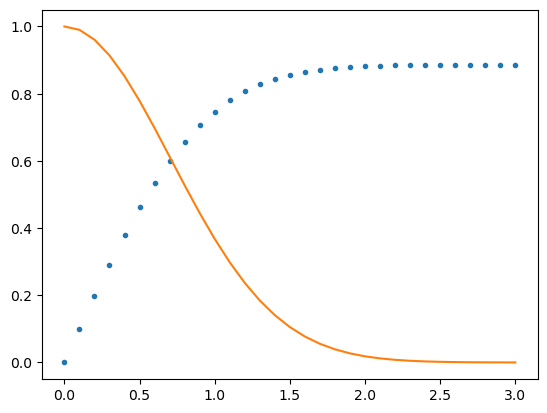

In [34]:
import matplotlib.pyplot as plt

plt.plot(x, E_x, '.')
plt.plot(x, f(x))
plt.show()

Exercise 5.4: The diffraction limit of a telescope 

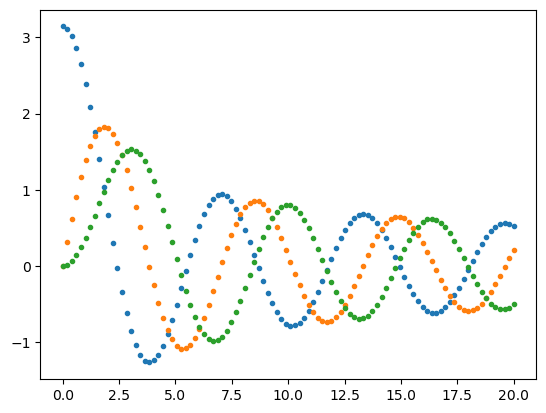

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def J(m, x):
    N = 1000
    a = 0
    b = pi
    h = (b-a)/N

    #s = f(a) + f(x)
    s = np.cos(m*a - x*np.sin(a)) + np.cos(m*b - x*np.sin(b))

    for k in range(1, N, 2):
        #s += 4*f(a + k*h)
        s += 4*np.cos(m*(a + k*h) - x*np.sin(a + k*h))
    for k in range(2, N, 2):
        #s += 2*f(a + k*h)
        s += 2*np.cos(m*(a + k*h) - x*np.sin(a + k*h))
    
    return (1/3)*h*s

x = np.linspace(0, 20, 100)

J_0 = J(0, x)
J_1 = J(1, x)
J_2 = J(2, x)


plt.plot(x, J_0, '.')
plt.plot(x, J_1, '.')
plt.plot(x, J_2, '.')

plt.show()

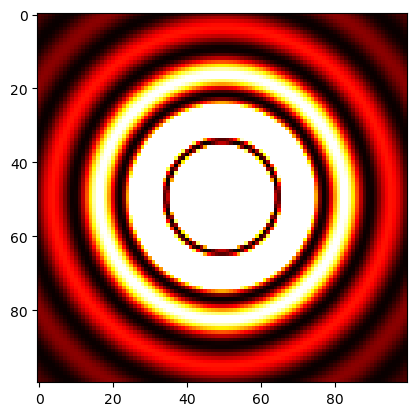

In [54]:
# b)
k = 20*pi/5
N = 100
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

# I(r)=(J_1(kr)/kr)^2

grid = np.zeros((N,N))

for i in range(len(x)):
    for j in range(len(y)):
        grid[i,j] = (J(1, k*np.sqrt(x[i]**2 + y[j]**2))/ (k*np.sqrt(x[i]**2 + y[j]**2)))**2
        
plt.imshow(grid, 'hot', vmax=0.01)